### Try Importing the Vgg16 Module and predict categories

In [1]:
# to draw stuff inline
%matplotlib inline

In [2]:
path = "data/dogscats/"
sample_path = "data/dogscats/sample/"

In [3]:
#standard init code
from __future__ import division, print_function

import os, json, glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [4]:
import utils; reload(utils)
from utils import plots

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
Using Theano backend.


In [5]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [6]:
vgg = Vgg16()

In [7]:
b_size = 8
batches = vgg.get_batches(path+'train', batch_size=b_size)

Found 23000 images belonging to 2 classes.


In [8]:
imgs, labels = next(batches)

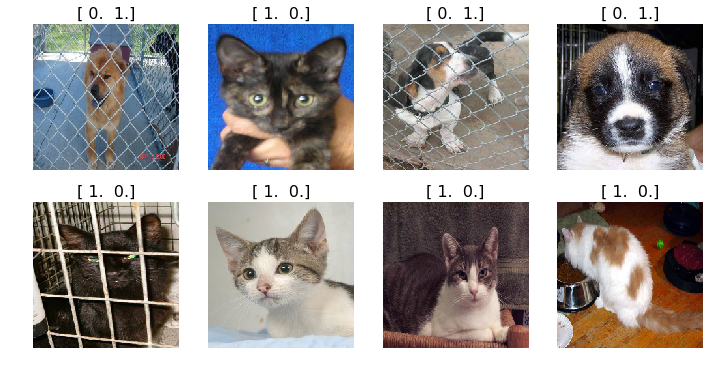

In [9]:
plots(imgs, titles=labels, rows=b_size/4)

In [10]:
vgg.predict(imgs, True)

(array([ 0.5186,  0.4526,  0.324 ,  0.6701,  0.8902,  0.1326,  0.4487,  0.2019], dtype=float32),
 array([273, 284, 161, 247, 357, 281, 285, 155]),
 [u'dingo',
  u'Siamese_cat',
  u'basset',
  u'Saint_Bernard',
  u'mink',
  u'tabby',
  u'Egyptian_cat',
  u'Shih-Tzu'])

### Finetune the model to distinguish cats v.s. dogs

In [11]:
batch_size = 128

In [12]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)

Found 23000 images belonging to 2 classes.


In [13]:
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 2000 images belonging to 2 classes.


In [16]:
vgg.finetune(batches)

In [17]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1


KeyboardInterrupt: 

### Try Vgg on Kaggle Competition

In [18]:
path = "data/dogs_cats_kaggle/"

In [19]:
batch_size = 128

In [98]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)

Found 23000 images belonging to 2 classes.


In [99]:
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 2000 images belonging to 2 classes.


In [100]:
vgg.finetune(batches)

In [101]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 731s - loss: 0.1361 - acc: 0.9628 - val_loss: 0.0563 - val_acc: 0.9815


In [24]:
test_batch = vgg.get_batches(path+'test', batch_size=batch_size)

Found 12500 images belonging to 1 classes.


In [25]:
imgs, labels = next(test_batch)

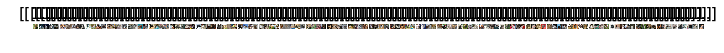

In [26]:
plots(imgs, titles=labels)

In [76]:
import csv, tqdm, keras
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img

In [90]:
def predict_on_test_set(path, vgg):
    test_imgs = glob.glob(os.path.join(path, 'test/unknown/', '*.jpg'))
    results = []
    with tqdm.tqdm(total=len(test_imgs), unit='images', unit_scale=True) as pbar:
        for n, img_path in enumerate(test_imgs):
            probs = vgg.model.predict(img_to_array(load_img(img_path, target_size=[224, 224])).reshape(1, 3,224,224))
            img_id = os.path.split(img_path)[-1][0:-4]
            results.append({'id': img_id,  'label': probs[0][1]})
            pbar.update(1)
        return results

In [102]:
results = predict_on_test_set(path, vgg)

100%|██████████| 12.5K/12.5K [08:27<00:00, 24.6images/s]  


In [92]:
results

[{'id': '2957', 'label': 6.0001608e-11},
 {'id': '11706', 'label': 1.0},
 {'id': '10629', 'label': 0.99998379},
 {'id': '9810', 'label': 1.0476418e-10},
 {'id': '9834', 'label': 5.0787419e-10},
 {'id': '5308', 'label': 0.99997497},
 {'id': '2850', 'label': 4.5358439e-10},
 {'id': '6998', 'label': 2.841377e-11},
 {'id': '6901', 'label': 0.99999976},
 {'id': '7008', 'label': 0.99999976},
 {'id': '10673', 'label': 0.99999952},
 {'id': '9721', 'label': 4.8367401e-14},
 {'id': '1516', 'label': 0.99965203},
 {'id': '12433', 'label': 0.99948007},
 {'id': '8143', 'label': 0.99999726},
 {'id': '12332', 'label': 1.0},
 {'id': '9660', 'label': 1.0},
 {'id': '1707', 'label': 2.2338634e-10},
 {'id': '6581', 'label': 2.9191014e-11},
 {'id': '4762', 'label': 4.2247135e-05},
 {'id': '314', 'label': 3.4092471e-05},
 {'id': '341', 'label': 3.120658e-06},
 {'id': '9123', 'label': 1.8308178e-08},
 {'id': '3721', 'label': 2.9851641e-05},
 {'id': '7553', 'label': 0.9999994},
 {'id': '5157', 'label': 0.99999

In [94]:
import pandas as pd

In [103]:
df = pd.DataFrame.from_records(results)
df['id'] = pd.to_numeric(df['id'])
df = df.sort_values('id')

In [104]:
df

,id,label
10852,1,9.999487e-01
10517,2,1.000000e+00
12471,3,1.000000e+00
493,4,1.000000e+00
1102,5,1.919588e-12
760,6,5.007911e-08
755,7,9.968883e-12
6216,8,1.565370e-11
11319,9,1.030502e-06
9998,10,4.065788e-10


In [105]:
df.to_csv('submission2.csv', index=False)